In [22]:
from typing import TypedDict
from langgraph.graph import StateGraph  # framework that helps you design and manage the flow of tasks in your application using a graph structure


In [23]:
# We now create an AgentState - shared data structure that keeps track of information as your application runs. 

class AgentState(TypedDict):
    message : str
    
def greeting_node(state: AgentState) -> AgentState:
    """Simple node that adds a greeting message to the state"""

    state["message"] = "Hey " + state["message"] + ", how are you doing?"
    
    return state

In [24]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node)

graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app = graph.compile()

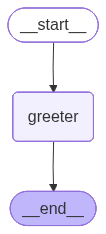

In [25]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [26]:
result = app.invoke({"message": "shiv"})

In [27]:
result["message"]

'Hey shiv, how are you doing?'